In [45]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%load_ext autoreload
%autoreload 2
import data


apple_df = pd.read_csv('AAPL_reversed.csv')

"""
New Question: Can we predict to see what the direction will the prices go the next day
"""
apple_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Date,Open,High,Low,Close,Volume
0,1984-09-07,0.100763,0.101999,0.099546,0.100763,9.767604e+07
1,1984-09-10,0.100763,0.101071,0.098340,0.100165,7.581254e+07
2,1984-09-11,0.101071,0.103814,0.101071,0.101999,1.787705e+08
3,1984-09-12,0.101999,0.102597,0.098928,0.098928,1.561713e+08
4,1984-09-13,0.104432,0.104730,0.104432,0.104432,2.432310e+08
...,...,...,...,...,...,...
9710,2023-03-20,155.070000,157.820000,154.150000,157.400000,7.364142e+07
9711,2023-03-21,157.320000,159.400000,156.540000,159.280000,7.393828e+07
9712,2023-03-22,159.300000,162.140000,157.810000,157.830000,7.570181e+07
9713,2023-03-23,158.830000,161.550100,157.680000,158.930000,6.762206e+07


In [46]:

#apple_df["Close"].iloc[0]
apple_df["Tomorrow"] = apple_df["Close"].shift(-1)
apple_df["Target"] = (apple_df["Tomorrow"] > apple_df["Close"]).astype(int)
apple_df = apple_df.loc["1990-01-01":].copy()
    


In [49]:
"""
Creating the models through functions that way I can put in different amounts of days that will be used in the logistic model to\n
see if the amount of days used to train and test will determine if the model will give better accuracies.

"""
def log_model(apple_df,time):##Function for making logistic predictions with only one feature
    apple_df = apple_df.reset_index(drop = True)
    apple_df = apple_df.iloc[-time:]
    apple_df = apple_df.dropna()
    x = apple_df["Close"]
    y = apple_df["Target"]

    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .5,shuffle = False,stratify = None)
    
    x_train = np.array(x_train)
    x_train = np.reshape(x_train,(-1,1))

    clf = LogisticRegression()
    clf.fit(x_train,y_train)
    x_test = np.array(x_test)
    x_test = np.reshape(x_test,(-1,1))
    y_pred = clf.predict(x_test)
    y_test = np.array(y_test)
    
    pred_score = 0
    for i in range(len(y_pred)):
        val_pred = y_pred[i]
        val_true = y_test[i]
        if val_pred == val_true:
            pred_score += 1

    return pred_score/len(y_pred)


def log_model_two(apple_df,time):##Function for making logistic predictions with more than one function
    apple_df = apple_df.reset_index(drop = True)
    apple_df = apple_df.iloc[-time:]
    apple_df = apple_df.dropna()
    x = apple_df.drop(["Date","Tomorrow","Volume","Target"],axis = 1)
    y = apple_df["Target"]

    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .5,shuffle = False,stratify = None)
   

    clf = LogisticRegression()
    clf.fit(x_train,y_train)

    y_pred = clf.predict(x_test)
    y_test = np.array(y_test)
    
    pred_score = 0
    for i in range(len(y_pred)):
        val_pred = y_pred[i]
        val_true = y_test[i]
        if val_pred == val_true:
            pred_score += 1

    return pred_score/len(y_pred)



The average accuracy for the model with one feature is 0.46036770961022494


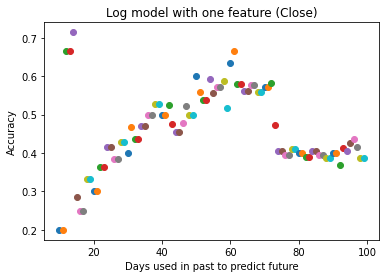

In [50]:
list_one_feature = []
for i in range(10,100):
    time = i
    plt.xlabel("Days used in past to predict future")
    plt.ylabel("Accuracy")
    plt.title("Log model with one feature (Close)")
    plt.scatter(i,log_model(apple_df,time))
    list_one_feature.append(log_model(apple_df,time))

print(f"The average accuracy for the model with one feature is {np.mean(list_one_feature)}")

The average accuracy for the model with many features is 0.4411007376294077


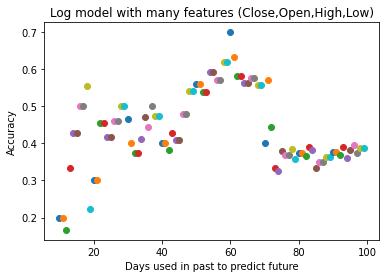

In [51]:
list_many_feature = []
for i in range(10,100):
    time = i
    plt.scatter(i,log_model_two(apple_df,time))
    plt.xlabel("Days used in past to predict future")
    plt.ylabel("Accuracy")
    plt.title("Log model with many features (Close,Open,High,Low)")
    list_many_feature.append(log_model_two(apple_df,time))


print(f"The average accuracy for the model with many features is {np.mean(list_many_feature)}")

In [21]:
one_feature = np.mean(list_one_feature)
many_features = np.mean(list_many_feature)